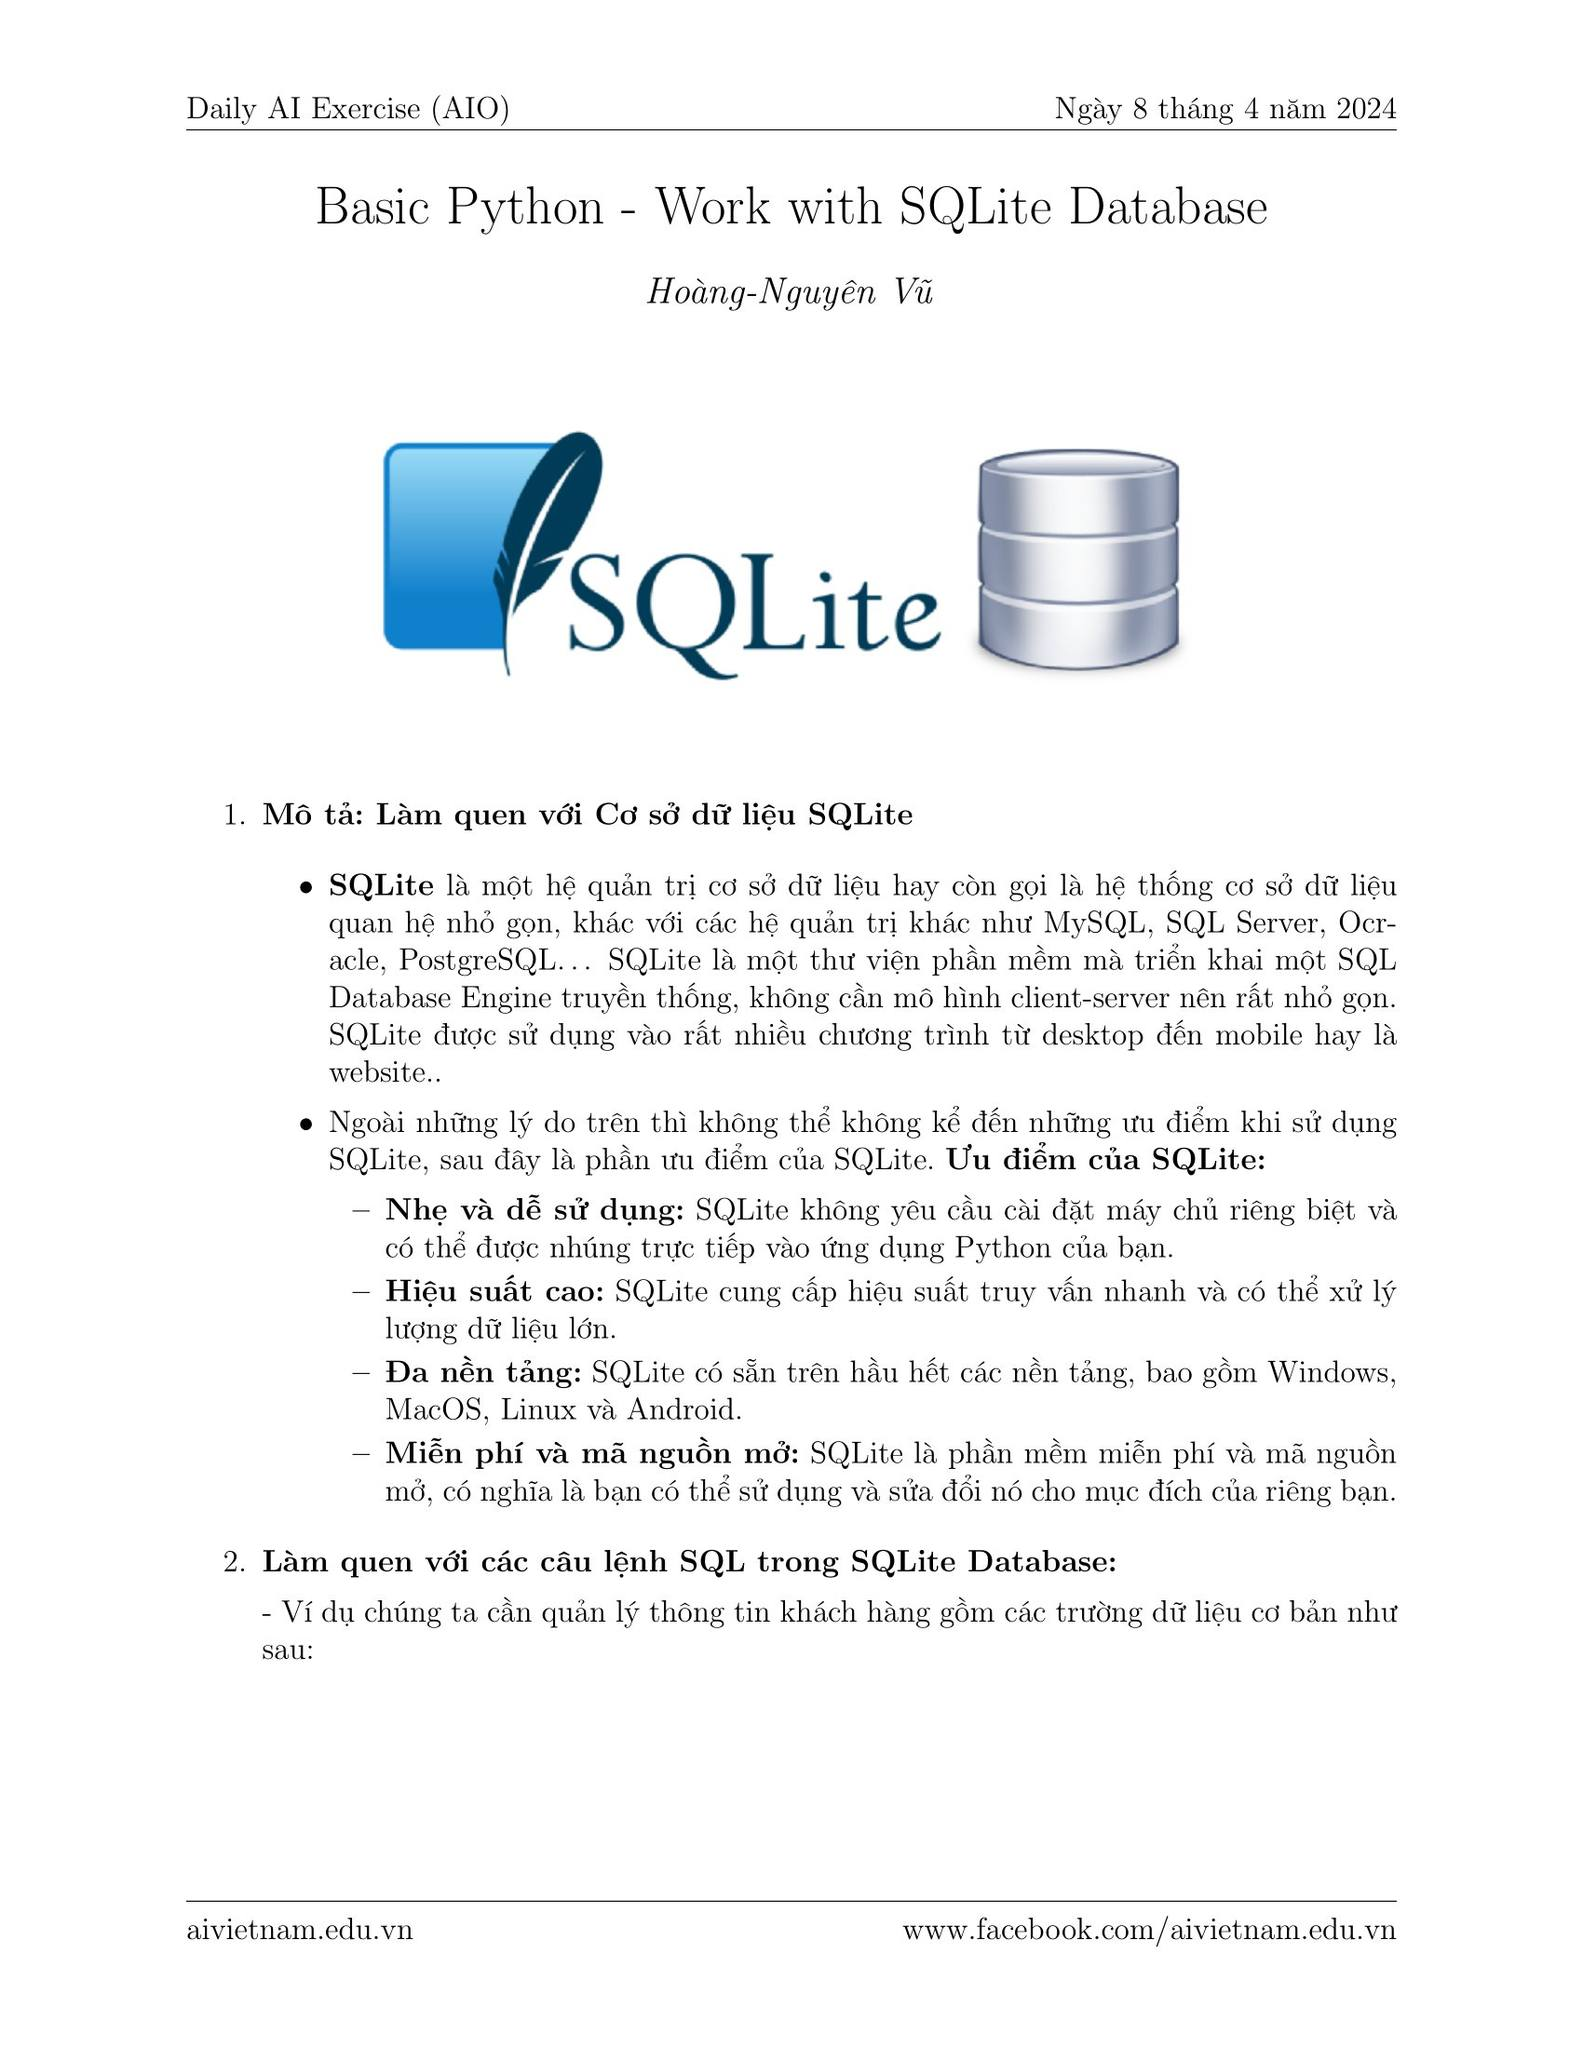
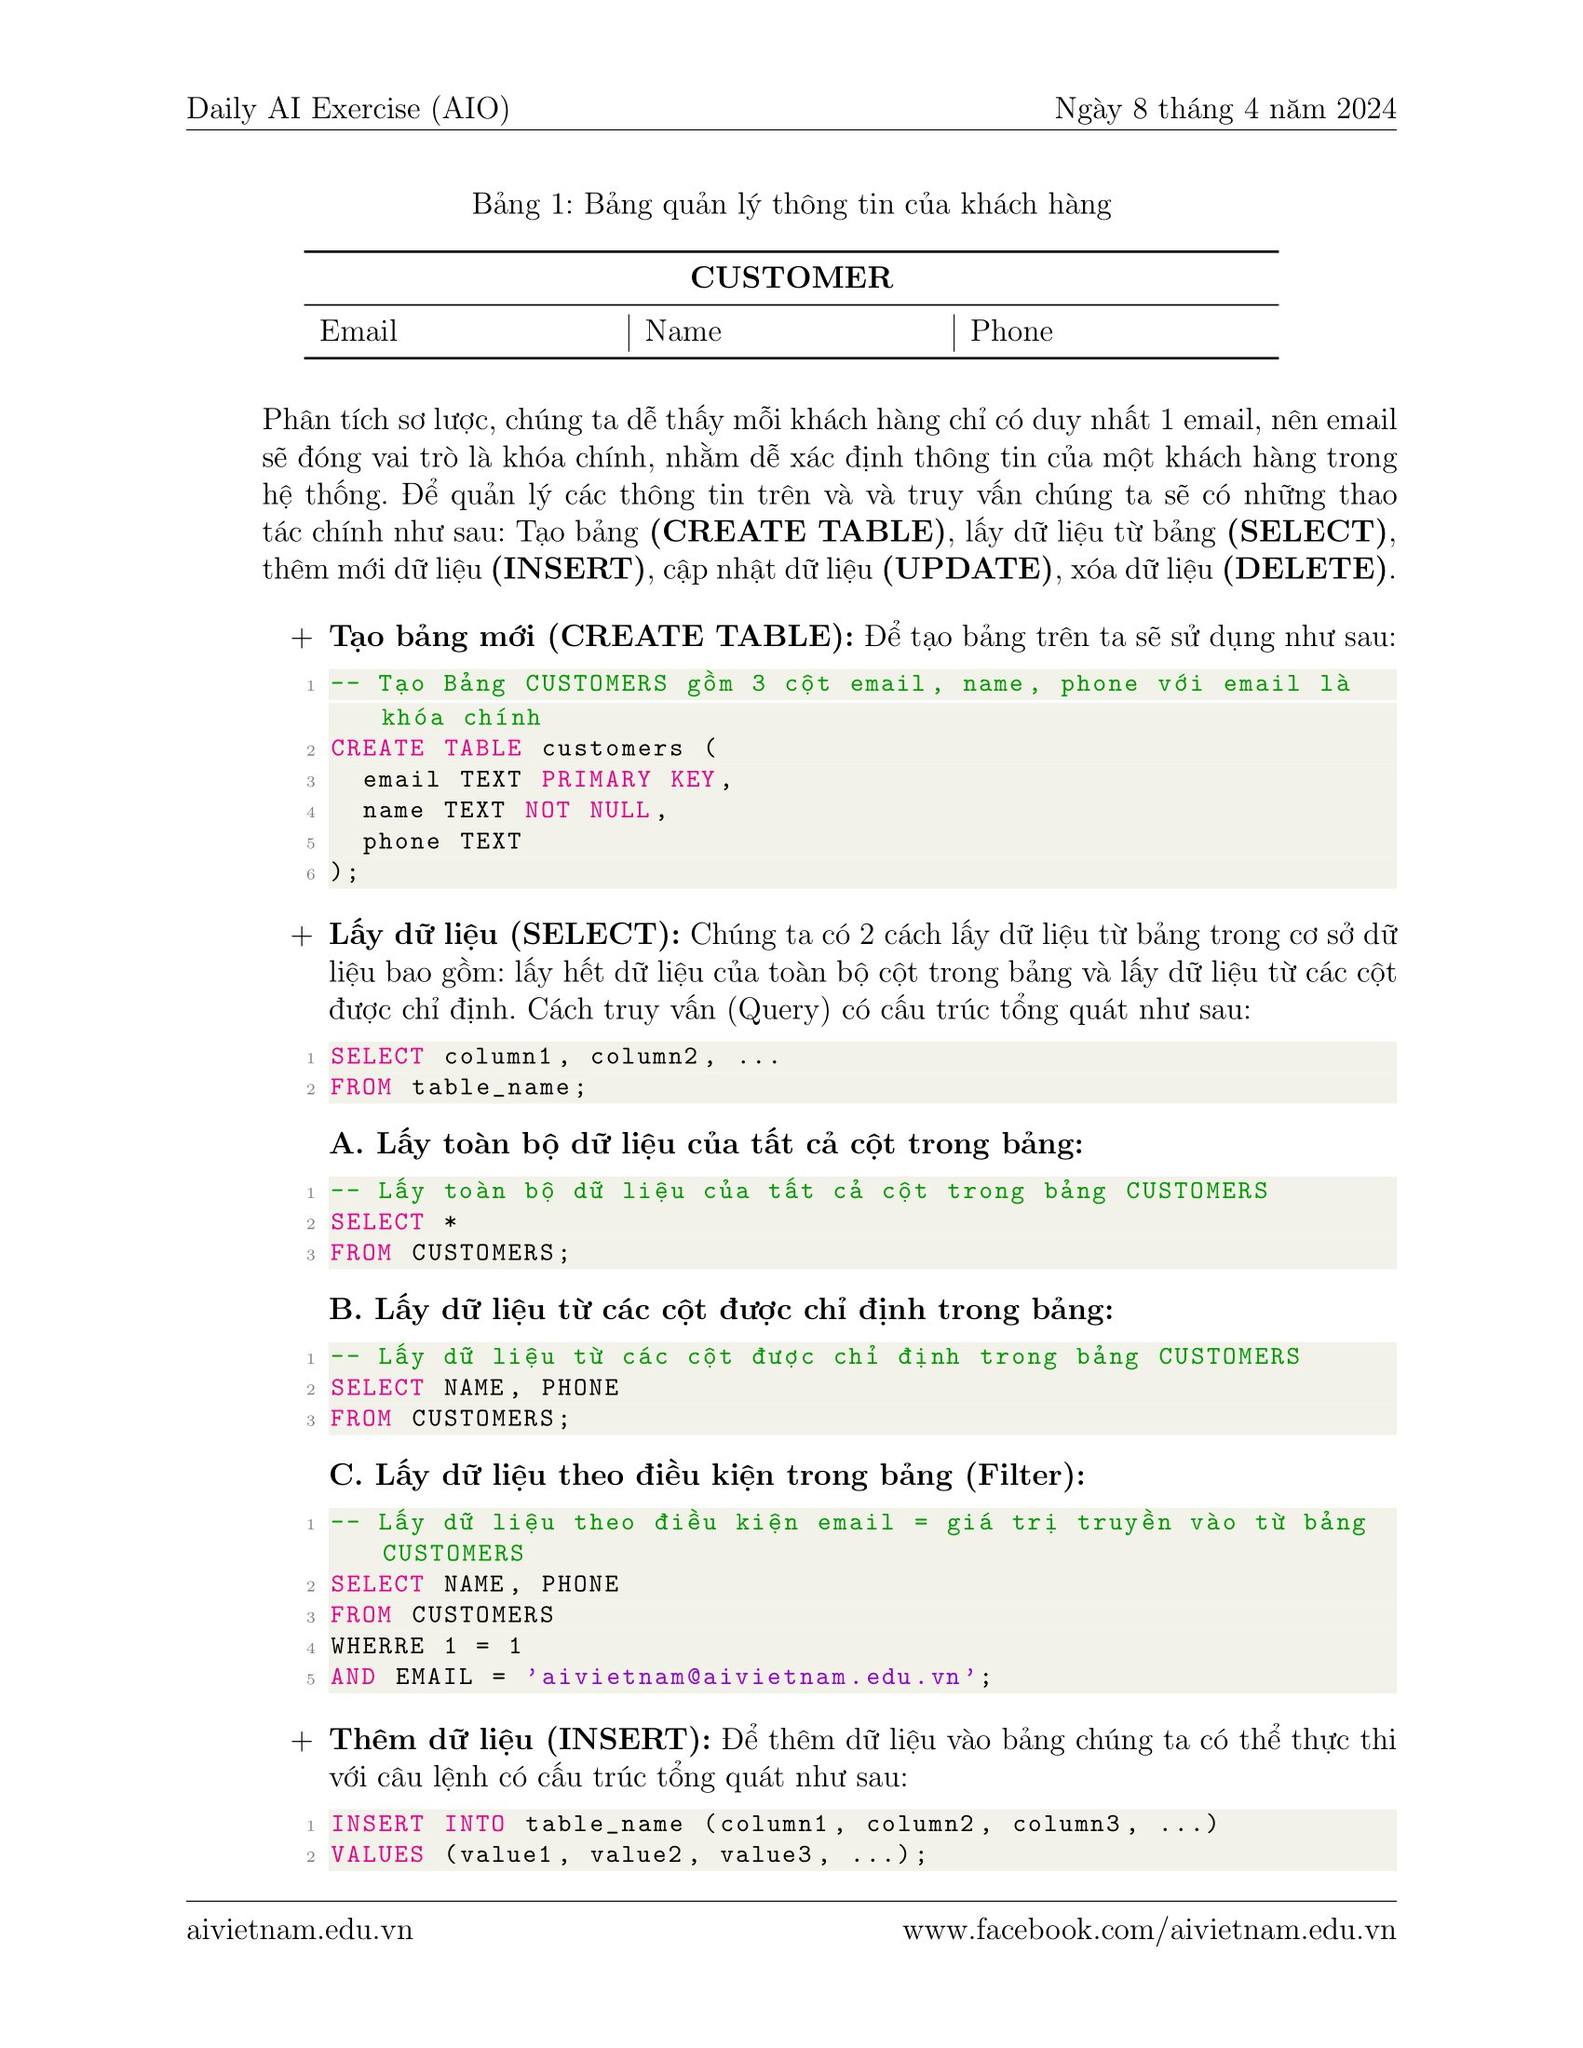
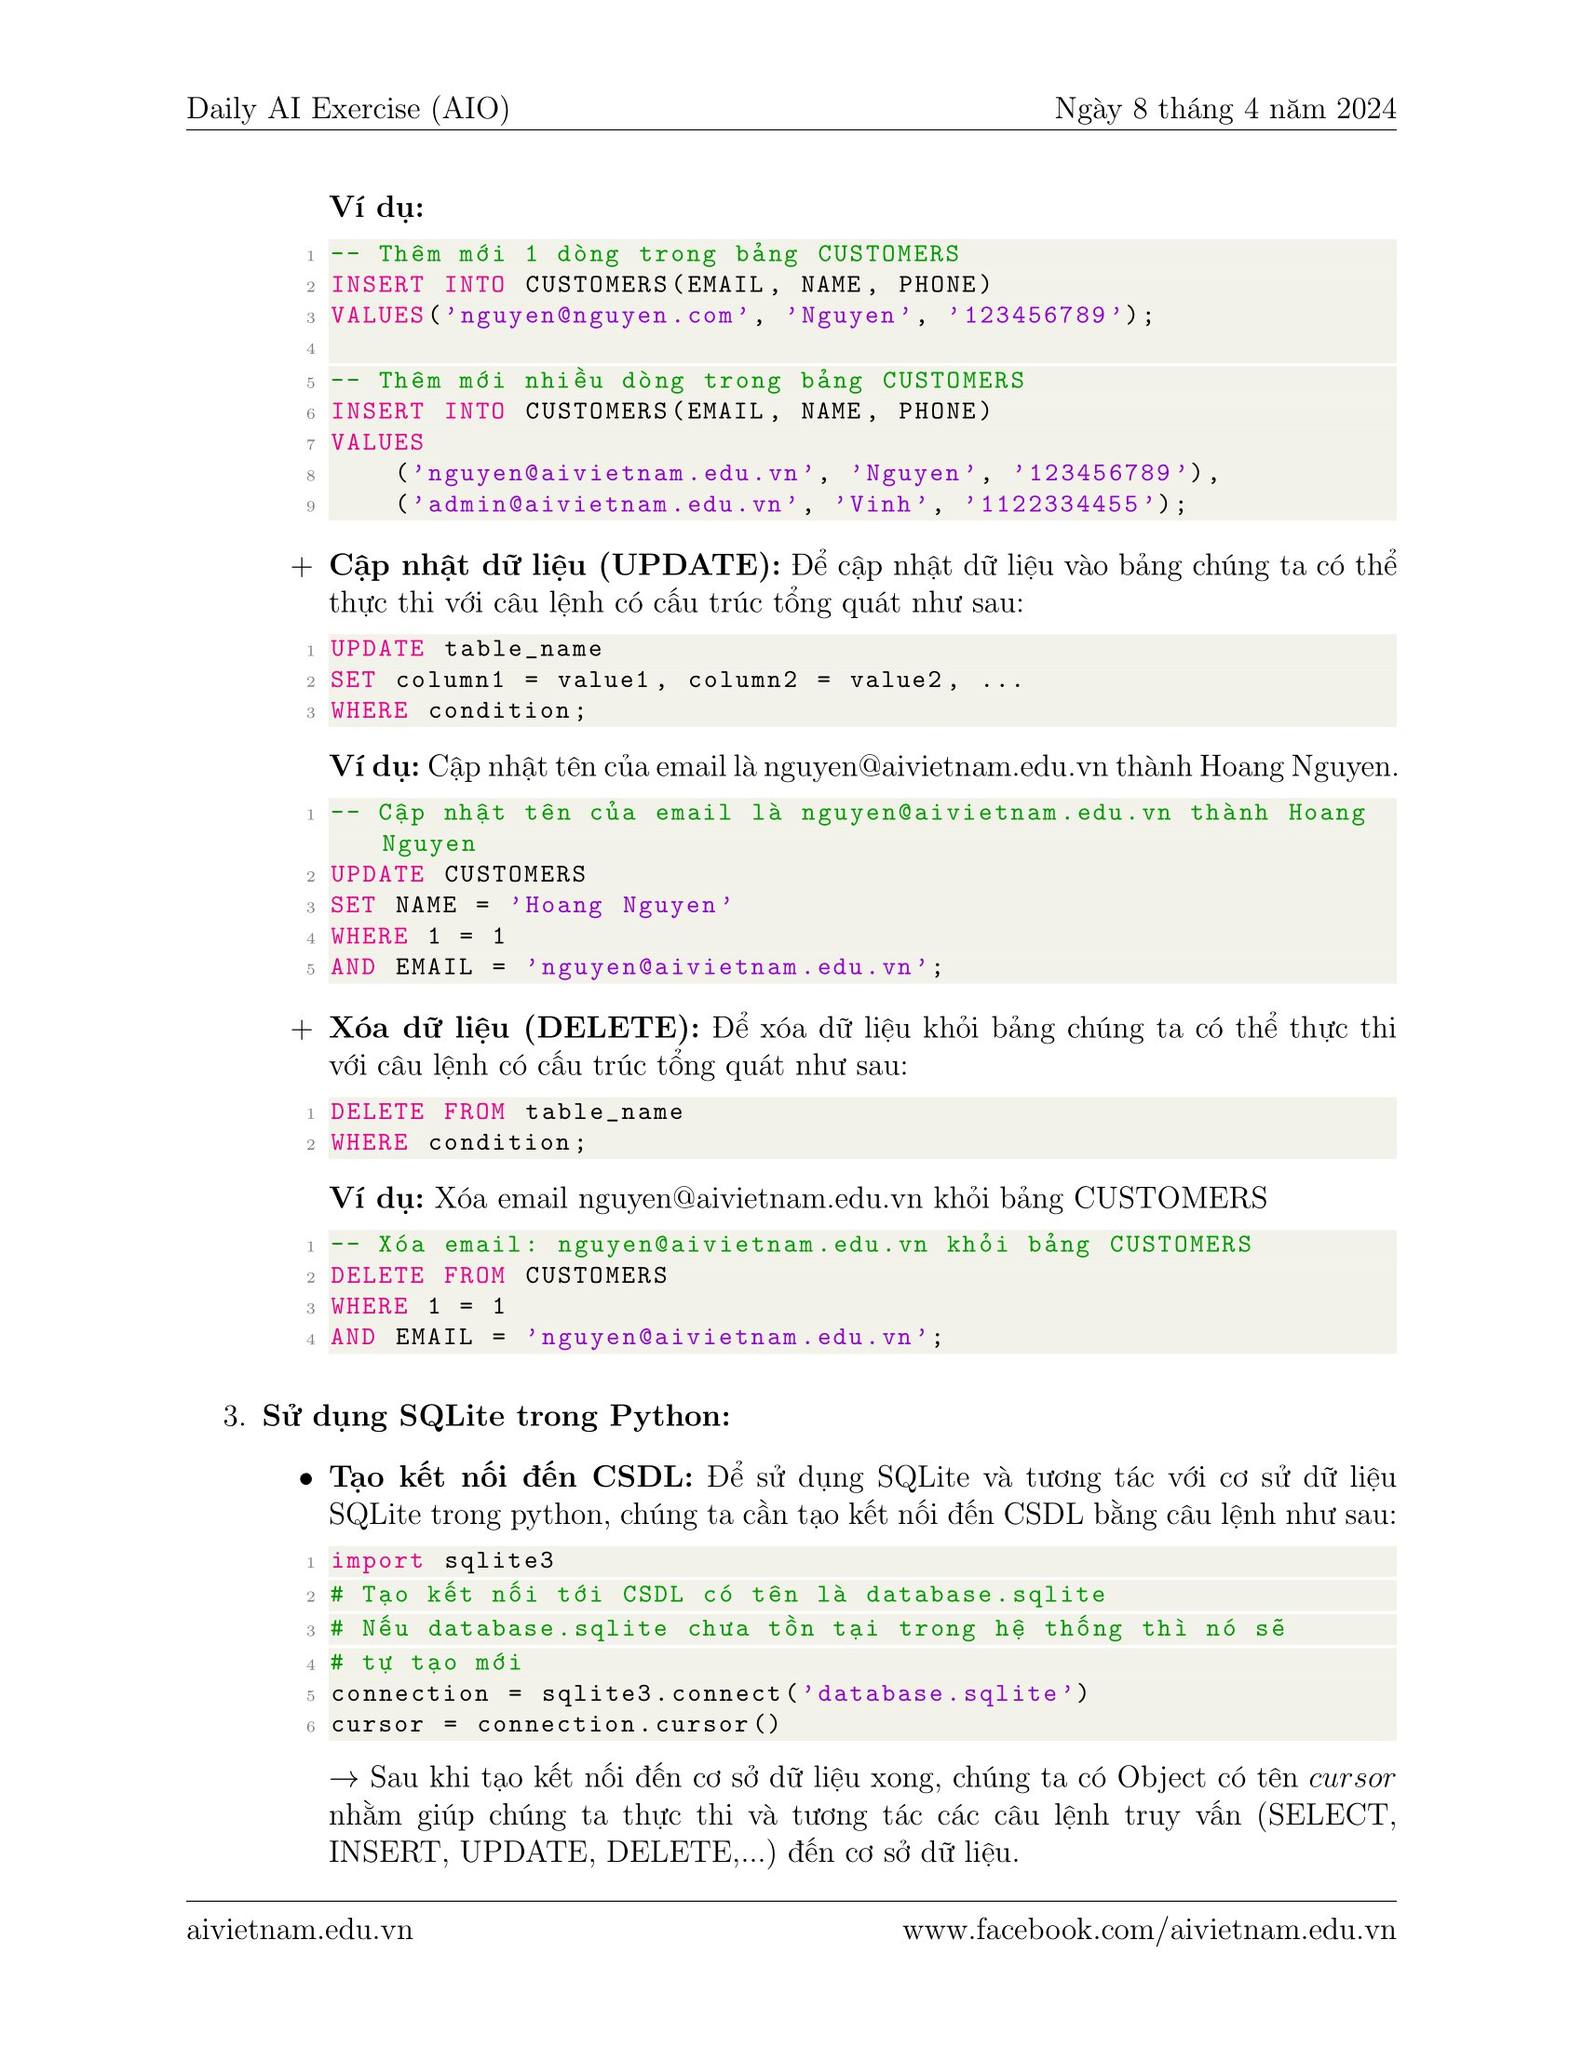
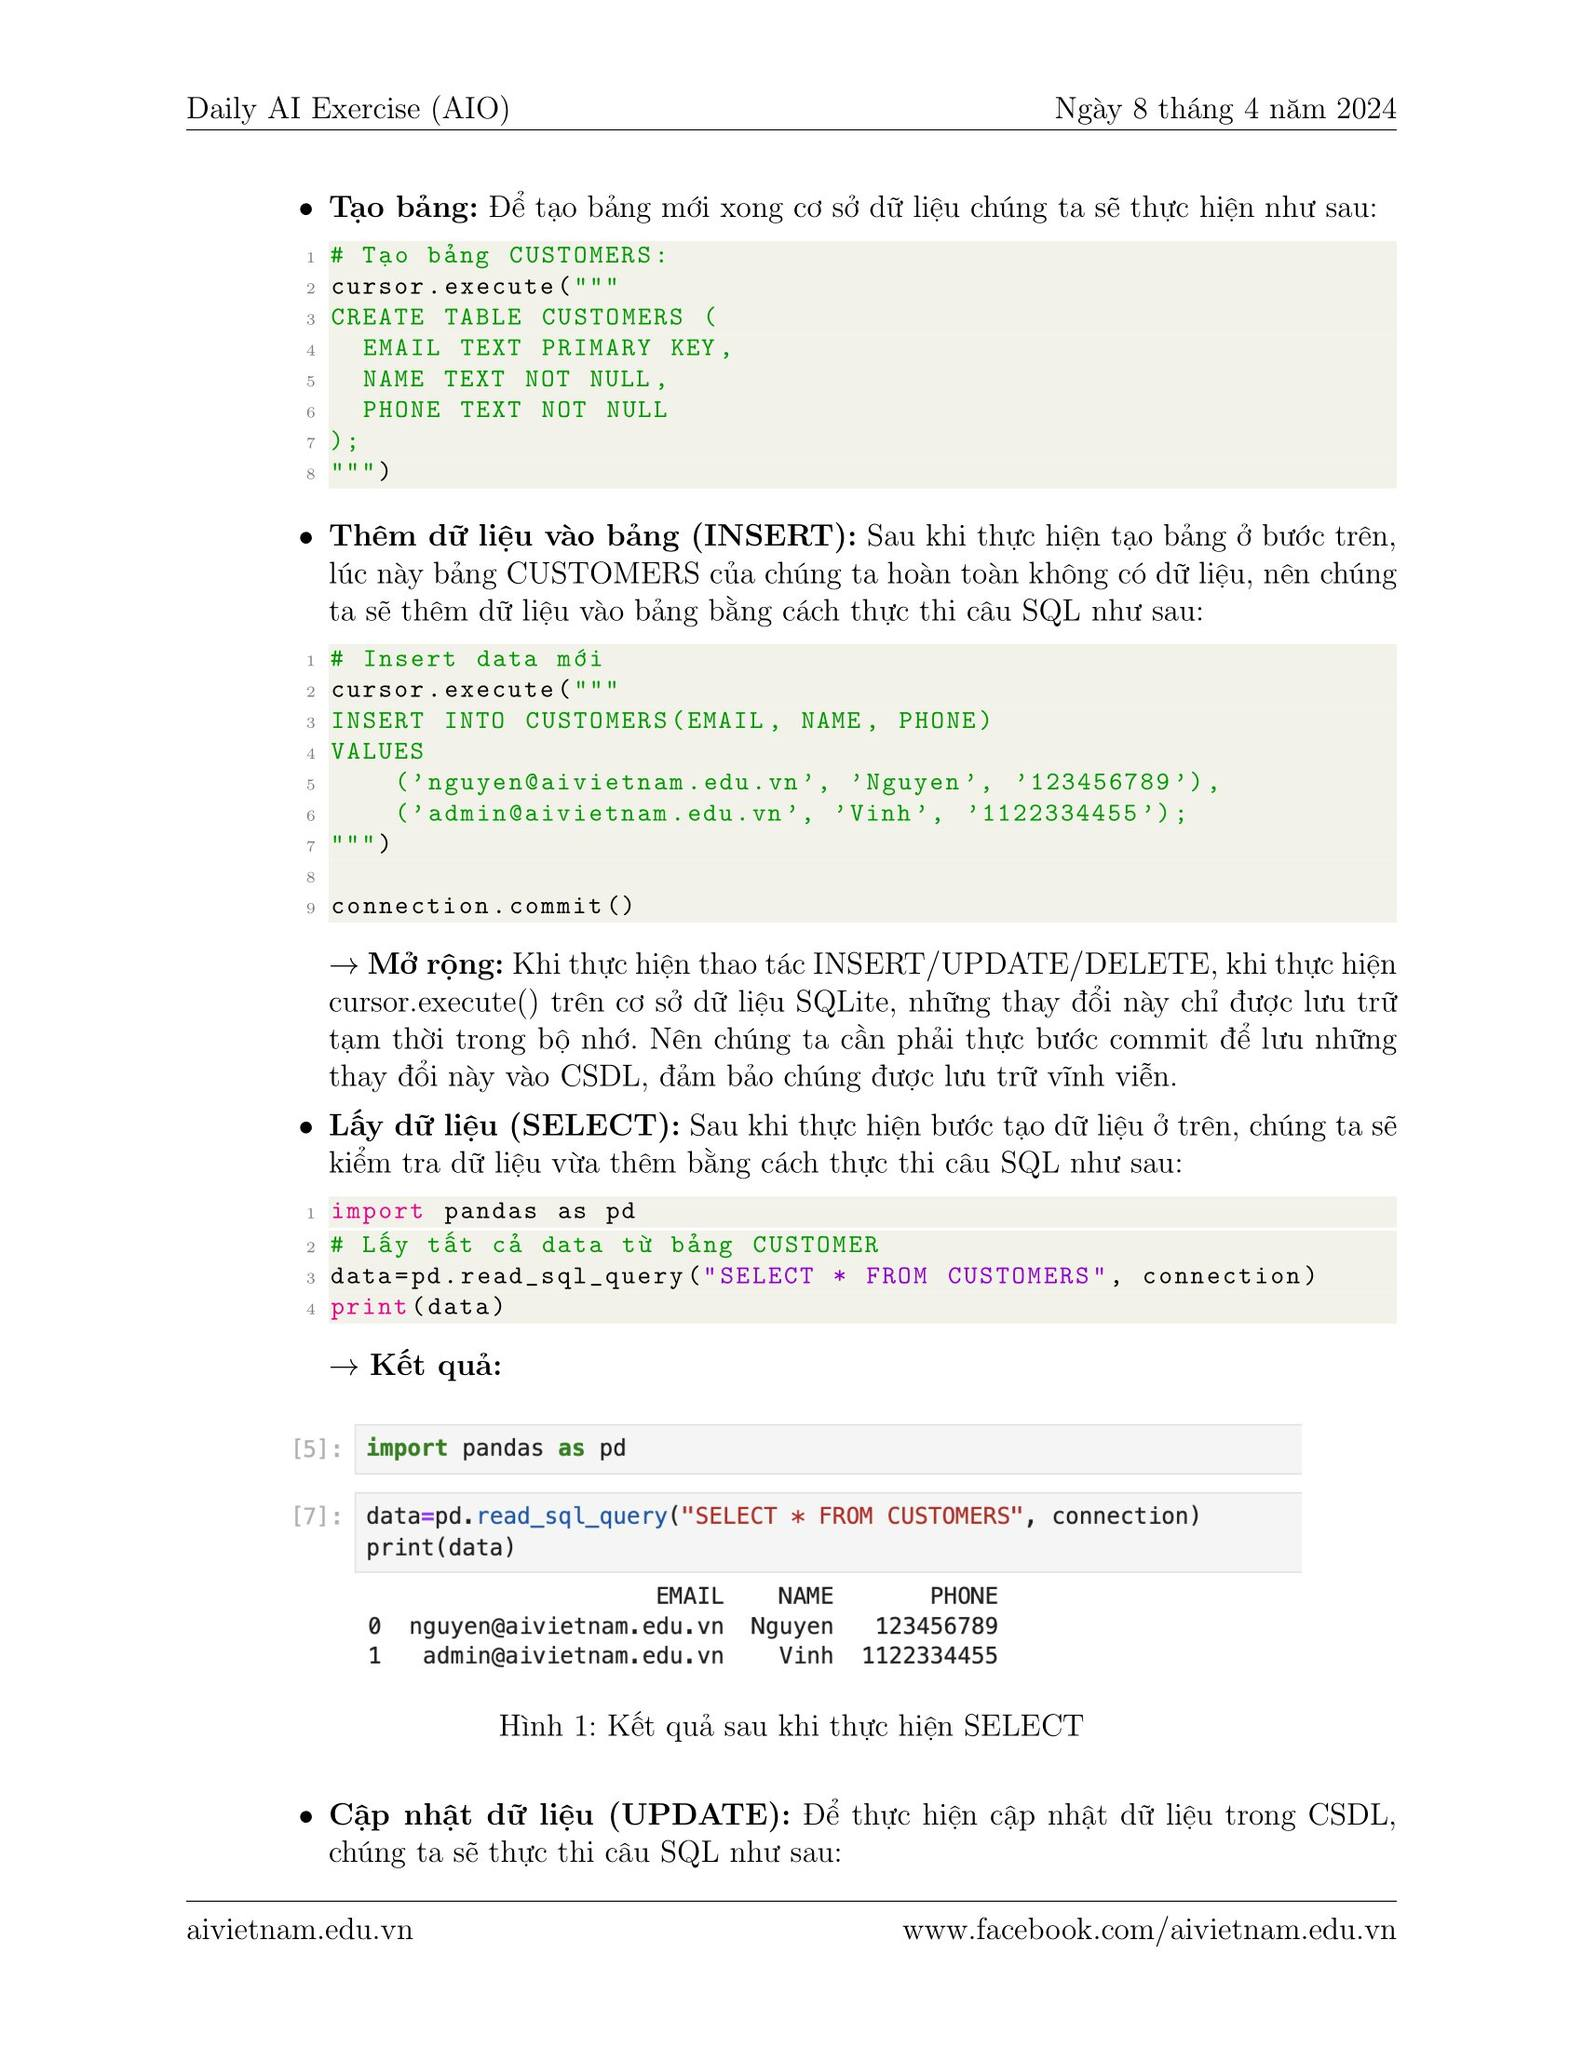
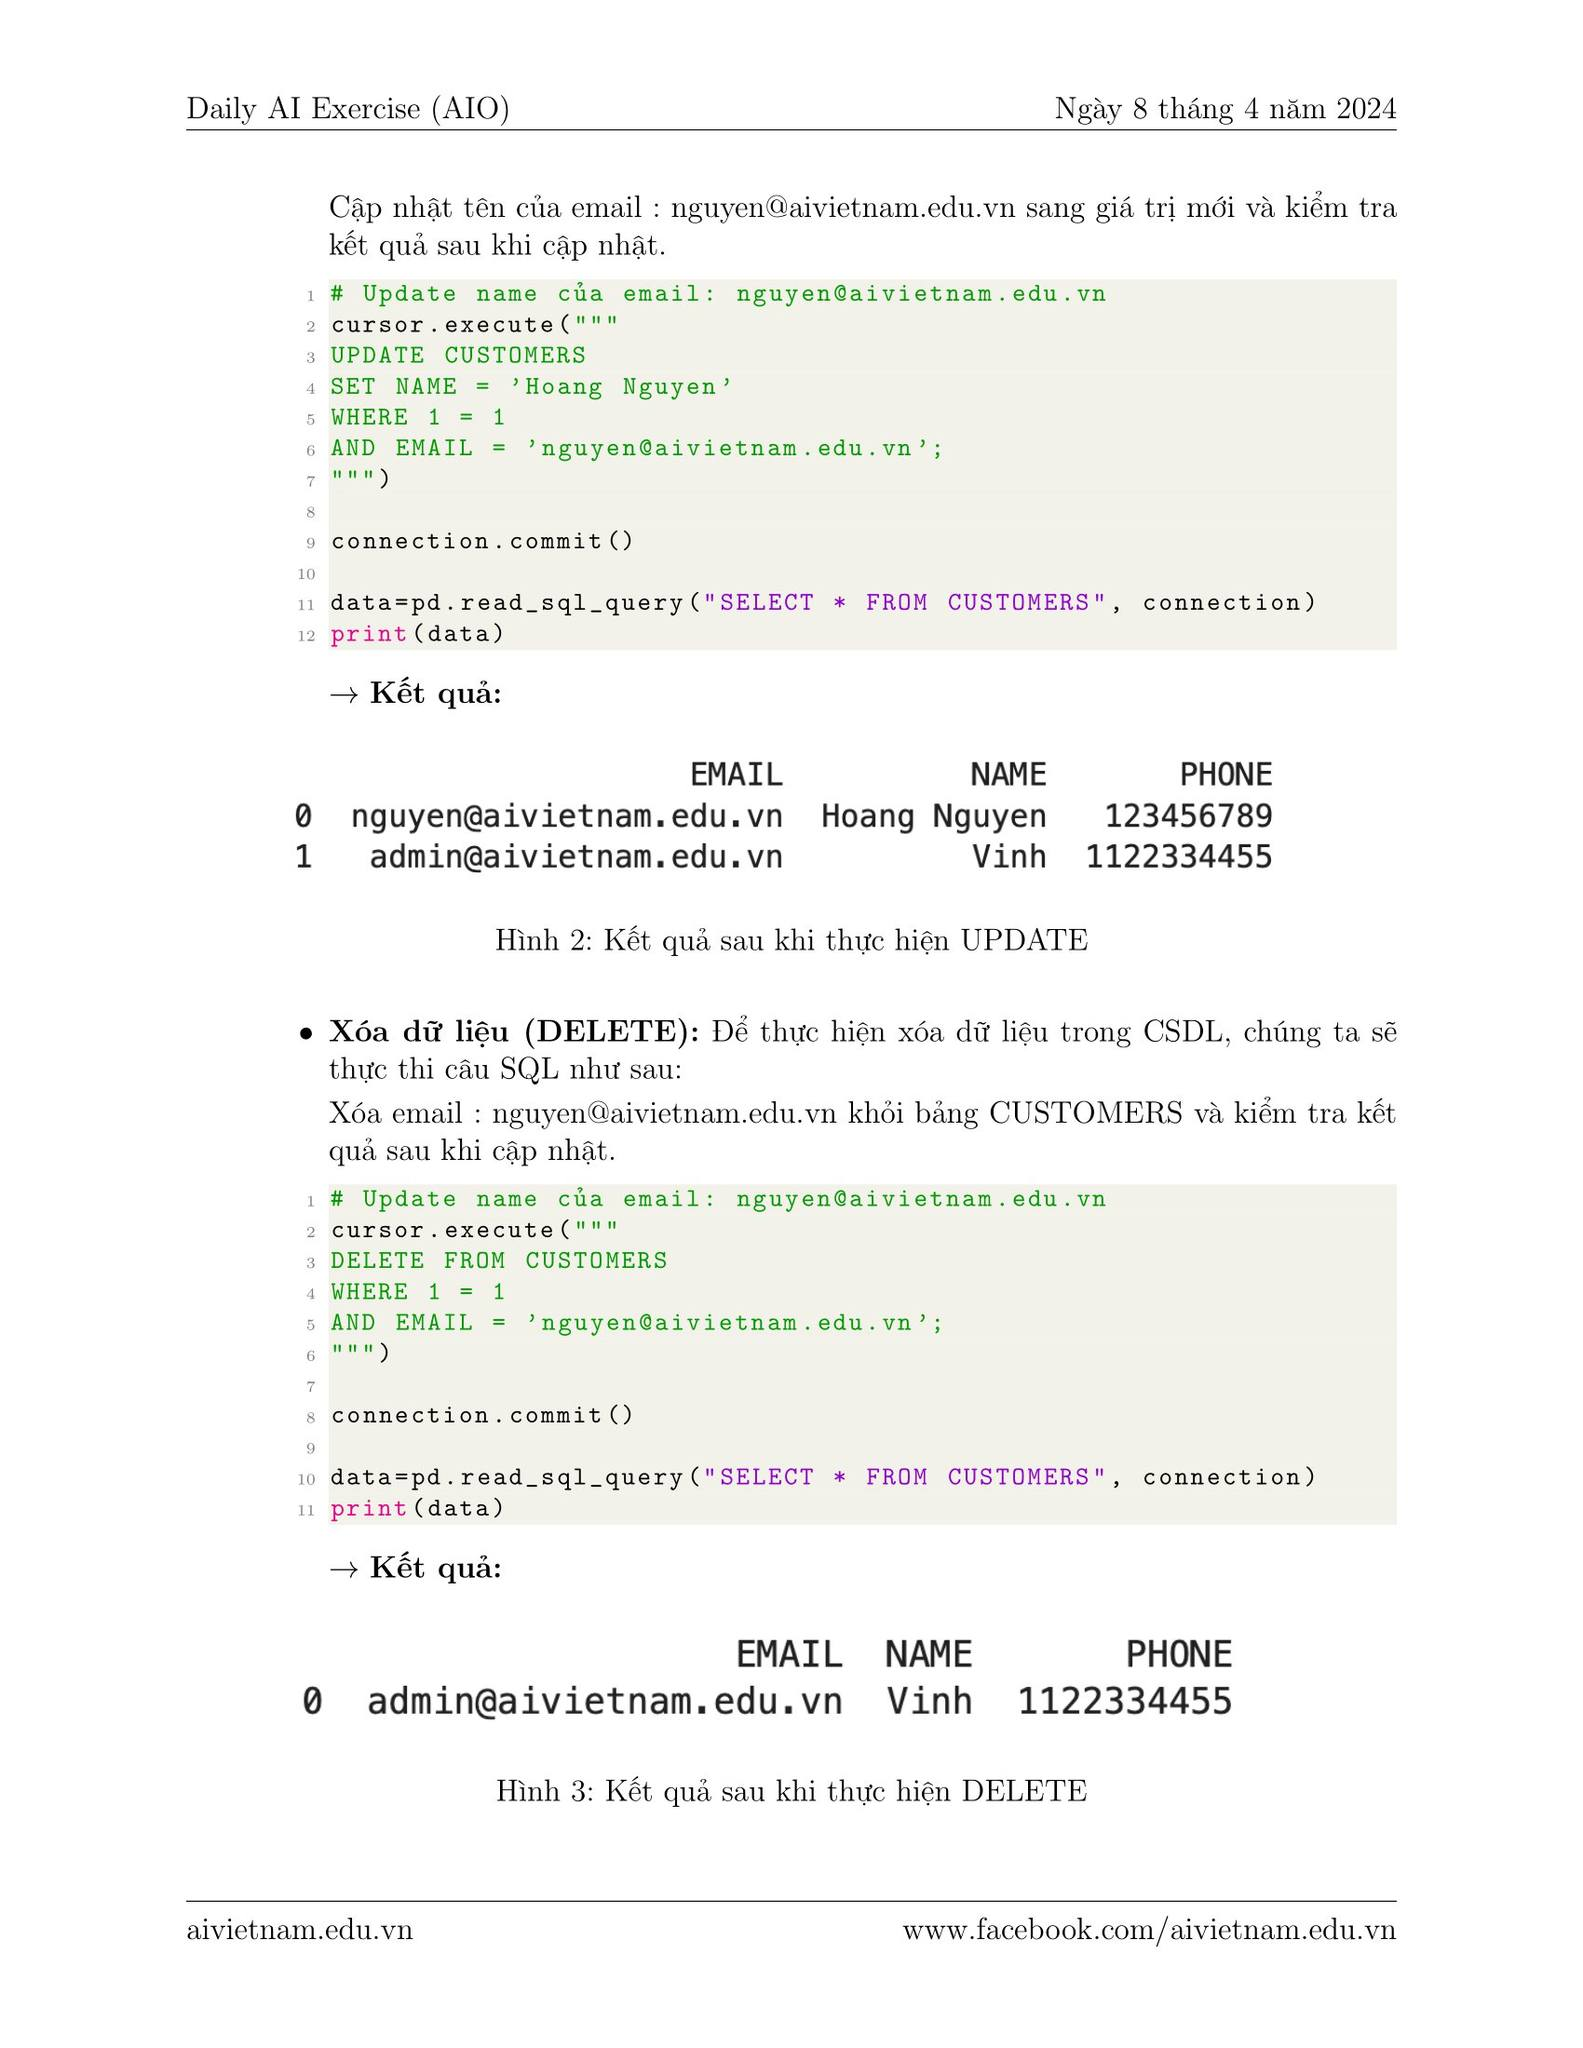
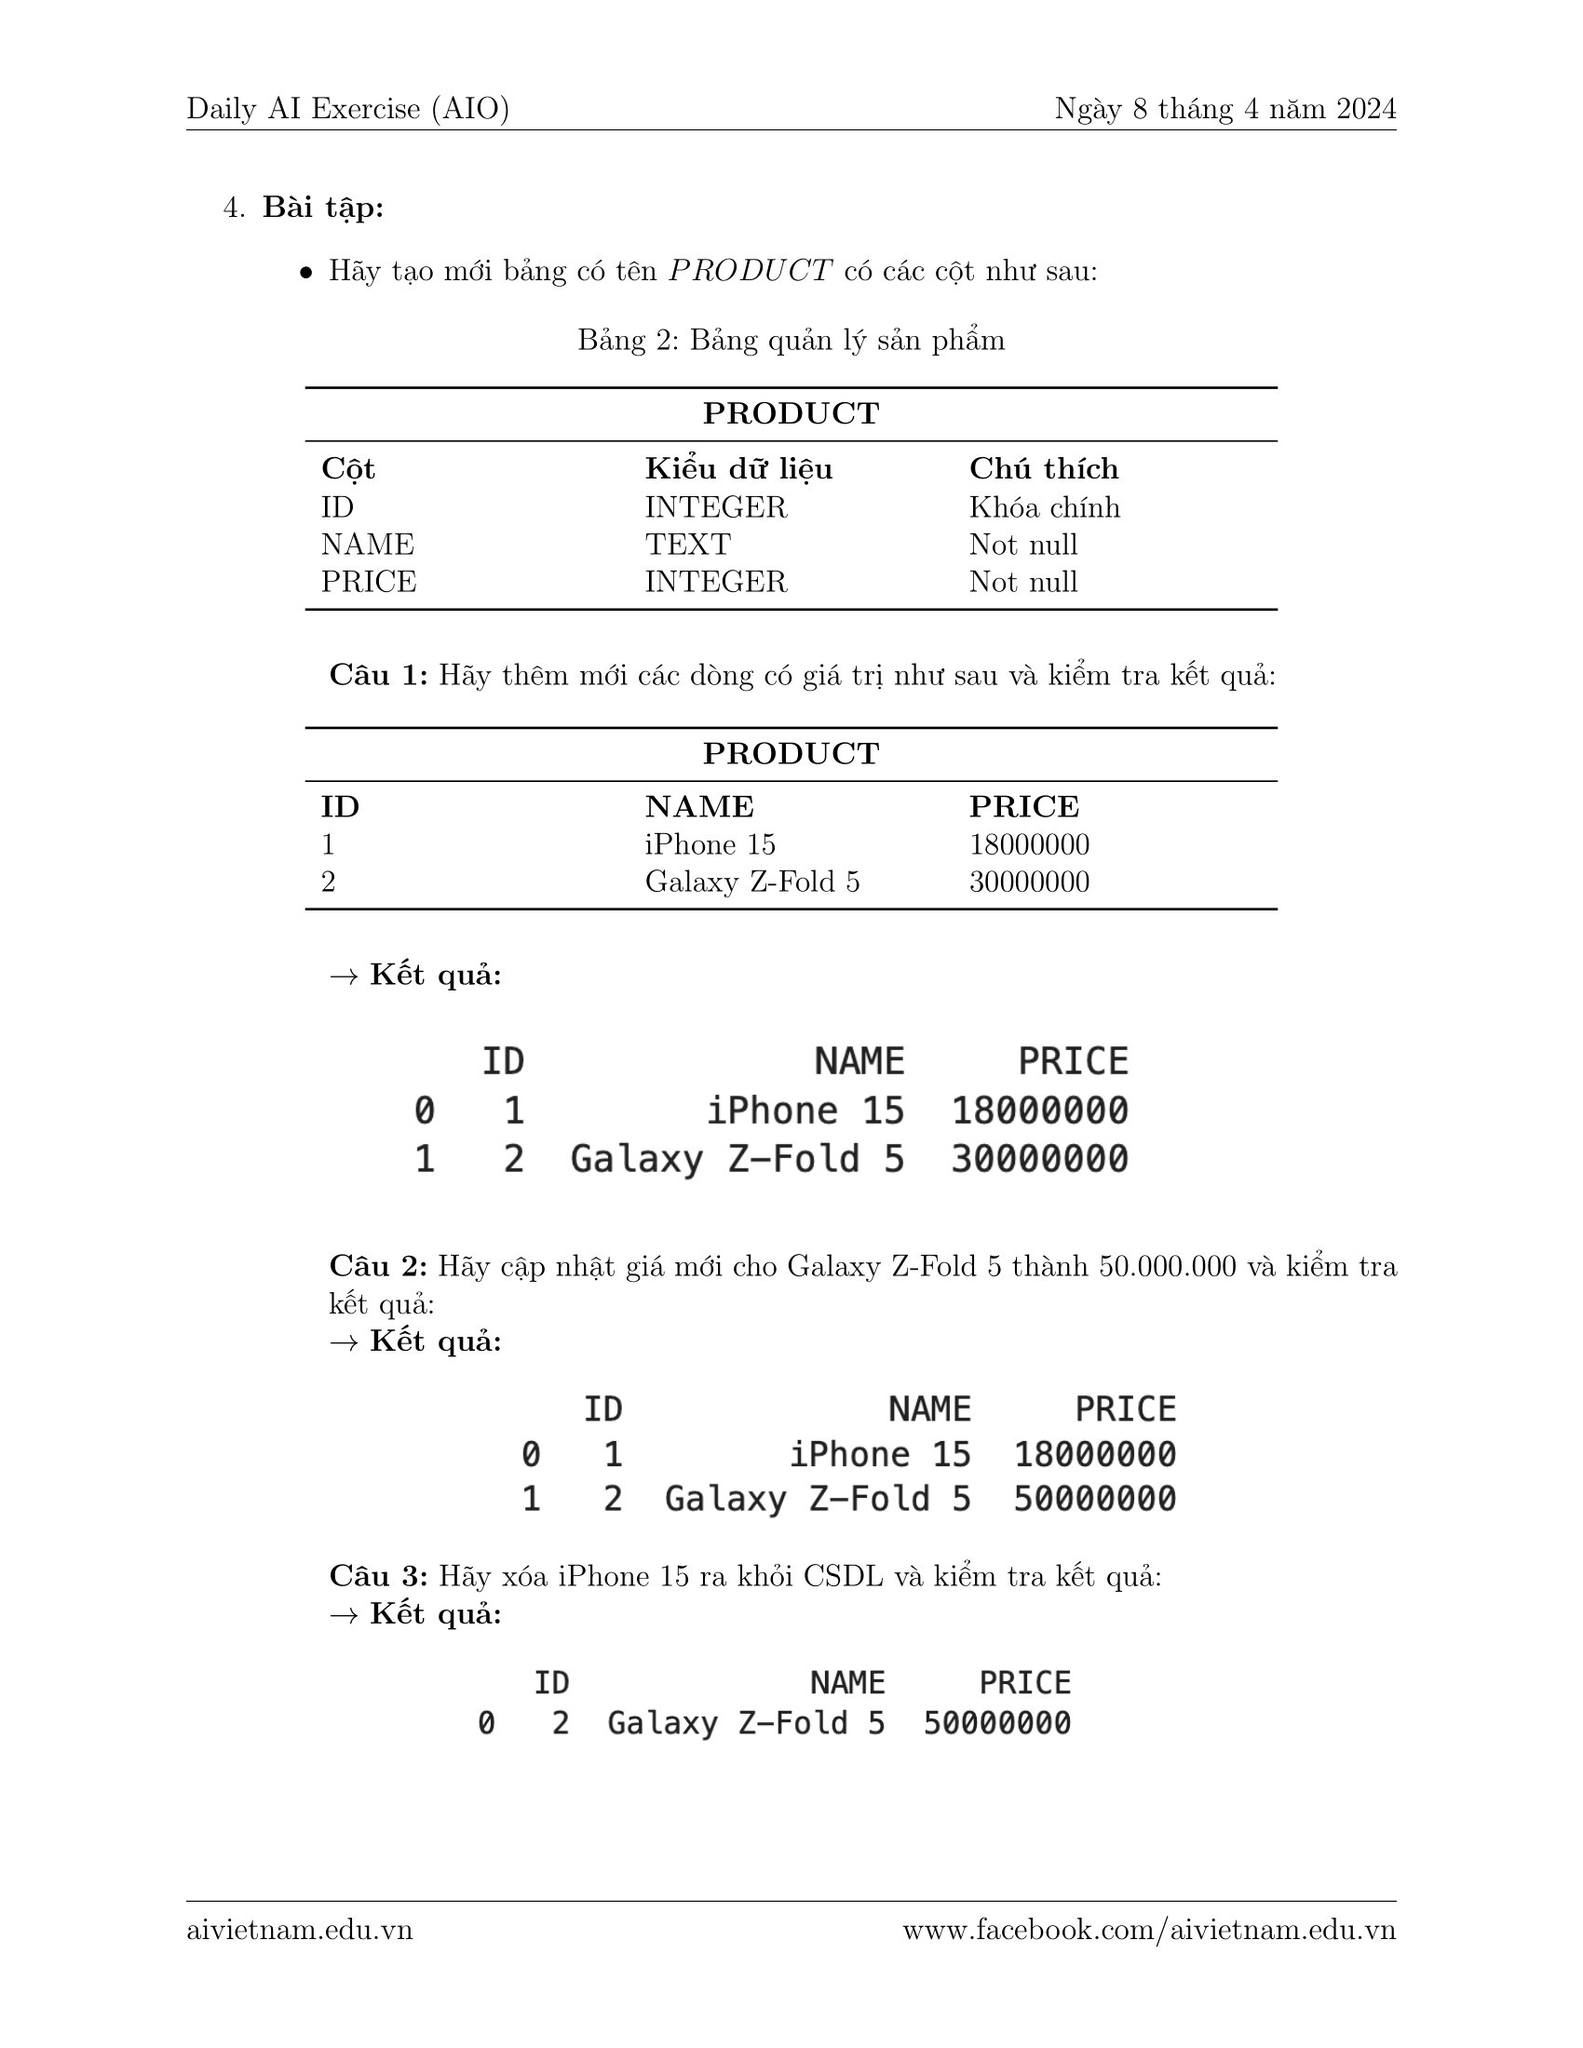

In [1]:
import sqlite3
# Tạo kết nối tới CSDL có tên là database.sqlite
# Nếu databse.sqlite chưa tồn tại trong hệ thống thì nó sẽ tự tạo mới
connection = sqlite3.connect('database.sqlite')
cursor = connection.cursor()

In [2]:
# Tạo bảng CUSTOMERS:
cursor.execute("""
CREATE TABLE CUSTOMERS (
               EMAIL TEXT PRIMARY KEY,
               NAME TEXT NOT NULL,
               PHONE TEXT NOT NULL
)
""")

In [3]:
# Insert data mới
cursor.execute("""
INSERT INTO CUSTOMERS(EMAIL, NAME, PHONE)
VALUES
    ('nguyen@aivietnam.edu.vn', 'Nguyen', '123456789'),
    ('admin@aivietnam.edu.vn', 'Vinh', '1122334455');
""")

connection.commit()

In [4]:
import pandas as pd
# Lấy tất cả data từ bảng CUSTOMER
data = pd.read_sql_query("SELECT * FROM CUSTOMERS", connection)
print(data)

                     EMAIL    NAME       PHONE
0  nguyen@aivietnam.edu.vn  Nguyen   123456789
1   admin@aivietnam.edu.vn    Vinh  1122334455


In [5]:
# Update name của email: nguyen@aivietnam.edu.vn
cursor.execute("""
UPDATE CUSTOMERS
SET NAME = 'Hoang Nguyen'
WHERE 1 = 1
AND EMAIL = 'nguyen@aivietnam.edu.vn';
""")

connection.commit()

data = pd.read_sql_query("SELECT * FROM CUSTOMERS", connection)
print(data)

                     EMAIL          NAME       PHONE
0  nguyen@aivietnam.edu.vn  Hoang Nguyen   123456789
1   admin@aivietnam.edu.vn          Vinh  1122334455


In [6]:
# Xóa data
cursor.execute("""
DELETE FROM CUSTOMERS
WHERE 1 = 1
AND EMAIL = 'nguyen@aivietnam.edu.vn';
""")

connection.commit()

data = pd.read_sql_query("SELECT * FROM CUSTOMERS", connection)
print(data)

                    EMAIL  NAME       PHONE
0  admin@aivietnam.edu.vn  Vinh  1122334455


### Bài tập

In [7]:
# Tạo bảng PRODUCT
cursor.execute("""
CREATE TABLE PRODUCT(
    ID INTEGER PRIMARY KEY,
    NAME TEXT NOT NULL,
    PRICE INTEGER NOT NULL
)
""")

In [8]:
# câu 1: Insert data mới
cursor.execute("""
INSERT INTO PRODUCT(ID, NAME, PRICE)
VALUES
    ('1', 'iPhone 15', '18000000'),
    ('2', 'Galaxy Z-Fold 5', '30000000');
""")

connection.commit()

In [9]:
import pandas as pd
# Lấy tất cả data từ bảng PRODUCT
data = pd.read_sql_query("SELECT * FROM PRODUCT", connection)
print(data)

   ID             NAME     PRICE
0   1        iPhone 15  18000000
1   2  Galaxy Z-Fold 5  30000000


In [10]:
# Câu 2
cursor.execute("""
UPDATE PRODUCT
SET PRICE = '50000000' 
WHERE 1 = 1
AND NAME = 'Galaxy Z-Fold 5';
""")

connection.commit()
data = pd.read_sql_query("SELECT * FROM PRODUCT", connection)
print(data)

   ID             NAME     PRICE
0   1        iPhone 15  18000000
1   2  Galaxy Z-Fold 5  50000000


In [11]:
# câu 3
cursor.execute("""
DELETE FROM PRODUCT
WHERE 1 = 1
AND NAME = 'iPhone 15';
""")

connection.commit()
data = pd.read_sql_query("SELECT * FROM PRODUCT", connection)
print(data)

   ID             NAME     PRICE
0   2  Galaxy Z-Fold 5  50000000
